In [2]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp

In [3]:
#读取airbnb数据 房屋租赁平台数据

url = 'https://raw.githubusercontent.com/ChenYifan617/i2p-assessment2/main/listings.csv'
df = pd.read_csv(url, sep=',')
#输出dataframe的大小
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")
#展示前5行数据
df[0:5]

Data frame is 76,984 x 16


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,97,7,192,2020-03-26,1.48,2,279
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.17,2,365
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.67,1,150
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.36,15,330
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


In [5]:
#将读取的表格数据转换为空间数据
airbnb = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs='epsg:4326')
airbnb.crs
airbnb[0:2]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,97,7,192,2020-03-26,1.48,2,279,POINT (-0.11732 51.46225)
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.17,2,365,POINT (-0.11121 51.56802)


In [1]:
airbnb

NameError: name 'airbnb' is not defined

In [4]:
zone = gpd.read_file('./file/block.gpkg')
zone = zone.to_crs(epsg=4326)
zone.crs
zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        649 non-null    object  
 1   GSS_CODE    649 non-null    object  
 2   HECTARES    649 non-null    float64 
 3   NONLD_AREA  649 non-null    float64 
 4   LB_GSS_CD   649 non-null    object  
 5   BOROUGH     649 non-null    object  
 6   POLY_ID     649 non-null    int64   
 7   geometry    649 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 40.7+ KB


In [5]:
url2 = 'https://raw.githubusercontent.com/ChenYifan617/i2p-assessment2/main/DfTRoadSafety_Accidents_2019/Road%20Safety%20Data%20-%20Accidents%202019.csv'
crash = pd.read_csv(url2, sep=',',low_memory=False)
print(f"Data frame is {crash.shape[0]:,} x {crash.shape[1]}")
crash.info()
crash.head(5)

Data frame is 117,536 x 32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                            

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [6]:
geocrash = gpd.GeoDataFrame(crash, geometry=gpd.points_from_xy(crash.Longitude, crash.Latitude), crs='epsg:4326')
geocrash.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

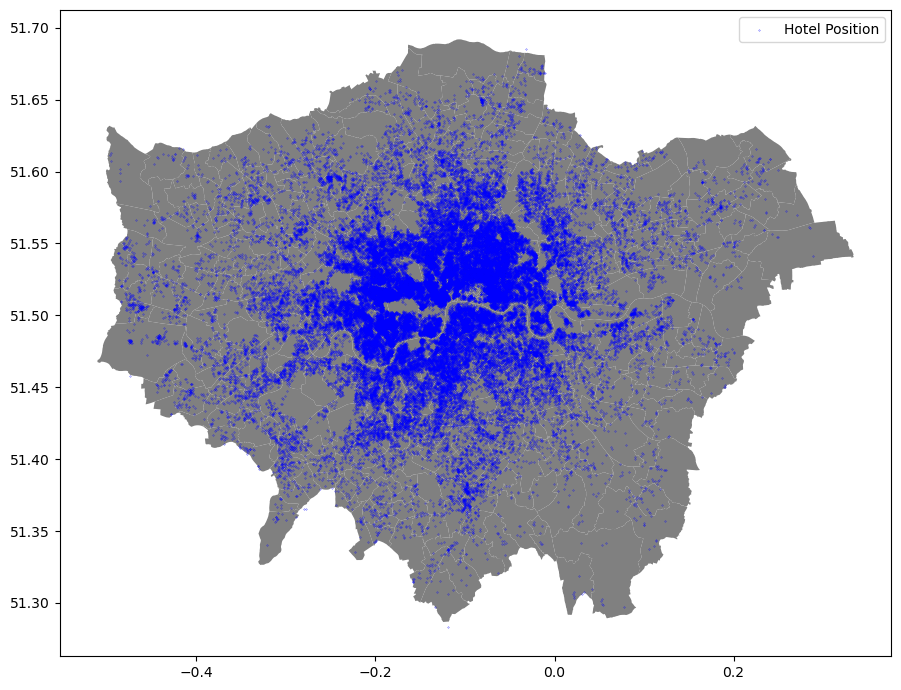

In [7]:
def hotelposition():
  f,ax = plt.subplots(figsize=(10,7))
  zone.plot(ax=ax, facecolor='gray');
  airbnb.plot(ax=ax, color='blue', markersize=0.05);
  plt.legend(['Hotel Position']);
  plt.tight_layout();
hotelposition()

In [8]:
#进行空间连接
airbnb_zone = gpd.sjoin(airbnb,zone, how="inner", op="within")
crash_zone = gpd.sjoin(geocrash,zone, how="inner", op="within")

#计算每个选区的交通事故频次
#POLY_ID 区号
countcrash = crash_zone['POLY_ID'].value_counts()
count_crash= countcrash.to_frame()
count_crash= count_crash.rename(columns={'POLY_ID':'count'})
count_crash['POLY_ID'] = count_crash.index

#计算每个选区的平均房价
meanprice = airbnb_zone.groupby('POLY_ID').mean()['price']
mean_price = meanprice.to_frame()

#将房价和事故频次聚合至选区图层
merge_temp = zone.merge(mean_price,how = 'left',on='POLY_ID')
final_zone = merge_temp.merge(count_crash,how = 'left',on='POLY_ID')

#对于房价缺失的图层，用均值填充
final_zone.price.fillna(105, inplace=True)

d:\program\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
d:\program\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Ma\AppData\Local\Temp\ipykernel_36092\3315891705.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanprice = airbnb_zone.groupby('POLY_ID').mean()['price']


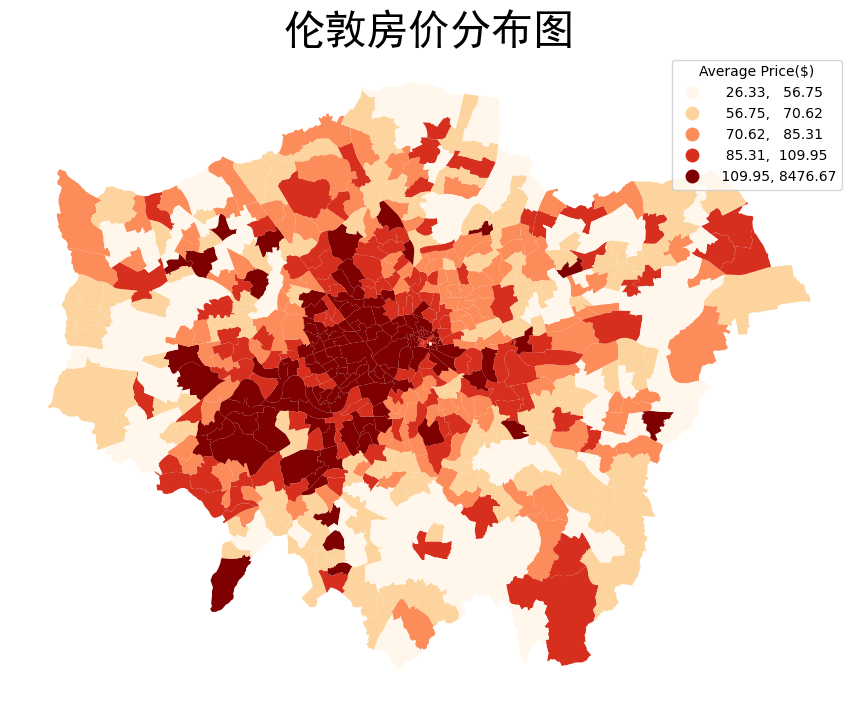

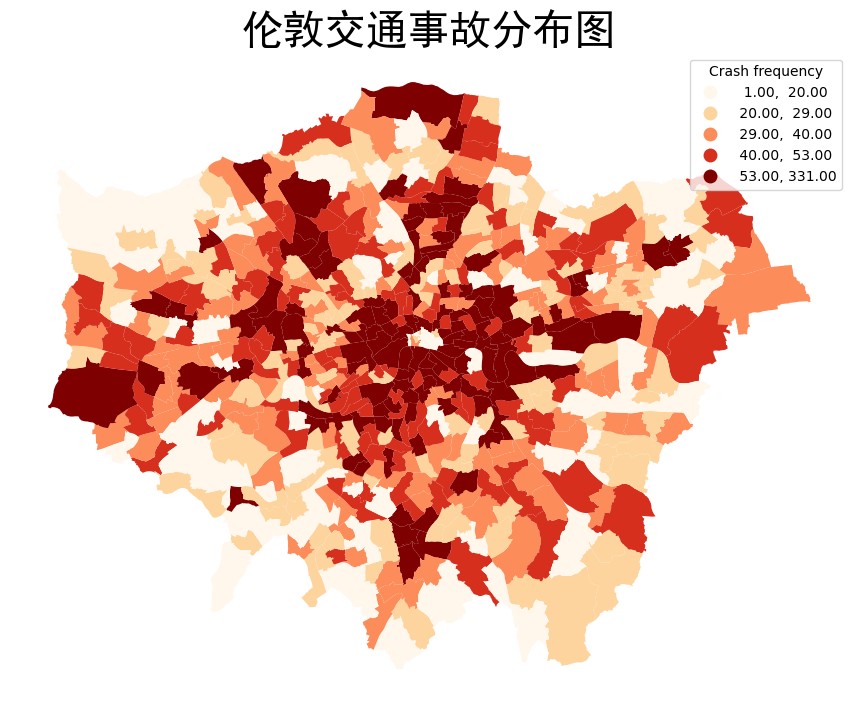

In [9]:
#绘制伦敦地区的房价分布图
def pricemap():
  f,ax = plt.subplots(figsize=(10,7))
  final_zone.plot(ax=ax,column='price', cmap='OrRd',scheme='quantiles',legend=True)
  plt.tight_layout();
  ax.axis('off') 
  ax.set_title('伦敦房价分布图',fontdict={'fontsize':'30', 'fontweight':'5','fontname': 'SimHei'})

  ax.get_legend().set_title("Average Price($)")
  
 #绘制交通事故分布图
def crashmap():
  f,ax = plt.subplots(figsize=(10,7))
  final_zone.plot(ax=ax,column='count', cmap='OrRd',scheme='quantiles',legend=True)
  plt.tight_layout();
  ax.axis('off') 
  ax.set_title('伦敦交通事故分布图',fontdict={'fontsize':'30', 'fontweight':'5','fontname': 'SimHei'})

  ax.get_legend().set_title("Crash frequency")


pricemap()
crashmap()

In [10]:
import statsmodels.formula.api as sm
reg = sm.ols(formula="count ~ price.apply(np.log)", data=final_zone).fit()
print( reg.params)
print(reg.summary()) 

Intercept              5.609492
price.apply(np.log)    7.607482
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.82
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           0.000623
Time:                        23:10:43   Log-Likelihood:                -3056.9
No. Observations:                 649   AIC:                             6118.
Df Residuals:                     647   BIC:                             6127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [12]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import sel_bw


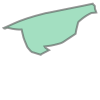

In [17]:
final_zone.geometry[2]

In [13]:
coordinates = final_zone[['longitude', 'latitude']].values
y = final_zone['count'].values.reshape((-1, 1))
X = final_zone[['price']].apply(np.log).values.reshape((-1, 1))

# 添加一个常数列到X中，对于GWR模型来说这是必需的
X = np.hstack((np.ones(y.shape), X))

# 使用自动带宽选择来寻找最佳带宽
bw = sel_bw(coordinates, y, X, kernel='bisquare', fixed=False).search()

# 使用找到的带宽拟合GWR模型
model = GWR(coordinates, y, X, bw, kernel='bisquare', fixed=False)
results = model.fit()

# 输出结果
print(results.params)
print(results.summary())


KeyError: "None of [Index(['longitude', 'latitude'], dtype='object')] are in the [columns]"

In [20]:
from osgeo import gdal